In [2]:
%%writefile requirements.txt
camel-tools

Writing requirements.txt


In [3]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.5/556.5 kB 21.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!camel_data -i light

The following packages will be installed: 'morphology-db-egy-r13', 'morphology-db-msa-s31', 'disambig-mle-calima-msa-r13', 'dialectid-model26', 'morphology-db-glf-01', 'disambig-mle-calima-egy-r13', 'morphology-db-lev-01', 'morphology-db-msa-r13'
Extracting package 'morphology-db-egy-r13': 100% 67.3M/67.3M [00:00<00:00, 243MB/s]
Extracting package 'morphology-db-msa-s31': 100% 44.8M/44.8M [00:00<00:00, 122MB/s]
Extracting package 'disambig-mle-calima-msa-r13': 100% 88.7M/88.7M [00:00<00:00, 127MB/s]
Extracting package 'dialectid-model26': 100% 371M/371M [00:01<00:00, 240MB/s]
Extracting package 'morphology-db-glf-01': 100% 7.98M/7.98M [00:00<00:00, 142MB/s]
Extracting package 'disambig-mle-calima-egy-r13': 100% 27.2M/27.2M [00:00<00:00, 476MB/s]
Extracting package 'morphology-db-lev-01': 100% 10.6M/10.6M [00:00<00:00, 373MB/s]
Extracting package 'morphology-db-msa-r13': 100% 40.5M/40.5M [00:00<00:00, 470MB/s]


In [ ]:
# !pip uninstall -y numpy
# !pip install numpy==1.26.4

In [4]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

from collections import defaultdict
import zipfile
import nltk
from nltk.corpus import stopwords
from camel_tools.morphology.analyzer import Analyzer
from camel_tools.morphology.database import MorphologyDB
import re
from camel_tools.tokenizers.word import simple_word_tokenize
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from google.colab import drive
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [5]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/MyDrive/osac-uft8.zip"

In [ ]:
extract_path = "/content/osac-uft8"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction terminée.")


Extraction terminée.


In [ ]:
for root, dirs, files in os.walk(extract_path):
    print("Dossier :", root)
    if dirs:
        print("Sous-dossiers :", dirs)
    if files:
        print(" Fichiers :", files)



📁 Dossier : /content/osac-uft8
  📂 Sous-dossiers : ['osac-uft8']
📁 Dossier : /content/osac-uft8/osac-uft8
  📂 Sous-dossiers : ['قصص', 'صحة', 'فلك', 'قانون', 'وصفات واكلات', 'دين وفتاوى شرعية', 'تاريخ', 'تربية و اسرة و مرأة', 'اقتصاد', 'رياضة']
📁 Dossier : /content/osac-uft8/osac-uft8/قصص
  📄 Fichiers : ['قصص قصص الاطفال قصص اطفال kids.jo ViewHtmlStory7591.html.txt.txt', 'قصص قصص صيد الفوائد قصص 94-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 240-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 95-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 255-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 109-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 117-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 214-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 312-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 1-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 215-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 70 (2)-.htm.txt.txt', 'قصص قصص صيد الفوائد قصص 44-.htm.txt.txt', 'قصص قصص الاطفال قصص اطفال kids.jo ViewHtmlStory0f88.html.txt.txt', 'قصص قصص صيد الفوائد قصص 101-.htm

In [ ]:
def clean_text(text):
    # Supprimer les chiffres arabes et occidentaux, sauf s'ils sont dans une date (optionnel)
    text = re.sub(r'[0-9\u0660-\u0669]', '', text)

    # Supprimer les lettres latines (majuscules et minuscules)
    text = re.sub(r'[A-Za-z]', '', text)

    # Supprimer la ponctuation arabe et occidentale
    punctuation = r'[.,!?;:"()\[\]{}…،ـ«»؟!@#$%^&*<>\\\/|+=~`؛]'
    text = re.sub(punctuation, '', text)

    # Supprimer les caractères spéciaux sauf les lettres et espaces arabes
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    # Supprimer les retours à la ligne et les tabulations
    text = re.sub(r'[\n\r\t]', ' ', text)

    # Réduire les multiples espaces à un seul
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
text = " العلاج البديل العربي : ابر الآر 41 لعلاج ضعف الحيوانات المنويه جديد الموقع لمعرفة كيفية الاتصال بنا الرجاء اضغط هنا ان اعجبك الموقع فتعرّف كيف تساعدنا اضغط هنا 2010-04-04 القائمة الرئيسية الطب البديل العقم الذكوري ومشاكل الانجاب العلاج الطبيعي الحجامة والطب النبوي الامراض المزمنة الأمراض الجلدية والتجميل جديد الطب المواضيع العامة مقالات ومواضيع مختارة روابط ذات صلة إضافة مقال اضفنا للمفضلة القائمة البريدية سجل الزوار ( عدد الزيارات ) 7401375 New Page 1 العقم الذكوري ومشاكل الانجاب علاج العقم الذكوري حسب biotherapeutic index العالمي للطب التجانسي2010 2010-01-21 07:42:57 عدد المشاهدات : 2489 عدد التعليقات : 0 المزيد الطب البديل ابر الآر 41 لعلاج ضعف الحيوانات المنويه 2007-07-02 01:24:00 عدد المشاهدات : 17548 عدد التعليقات : 2 الخاصة بزيادة الحركة والعدد للحيوانات المنويه تعتبر هذه الابر احدث ما انتجته المصانع الالمانيه المختصة بتصنيع الاعشاب حيث لوحظ ان الكثير من حالات عدم الانجاب يكون فيها العدد ممتاز 40 مليون ويزيد لكن المشاكل التاليه قد تكون موجوده اللزوجه العاليه او الحركة ضعيفة من 5-40% و\اونسبة الميت في العينه يكون مرتفع مع تشوه في عدد كبير من الحيوانات المنويه وبالتالي لا تعيش الحيونات المنويه اكثر من ساعه بعد خروجها للتلقيح و مستوى الفركتوز يكون منخفض في العينه مع وجود التهابات مزمنه غير مسيطر عليها وفي اغلب الحالات يكون مستوى الحموضه متذبذب في كل فحص من هنا كان التفكير بمثل هذه الحالات وهي ايضا تتبع الحالات التي اجرت عملية ازالة دوالي الخصيتين ثم اصبح العدد صفر بعد العملية ولم تنجح اي محاوله لاعادة العدد او النشاط للخصيتين. الابر الالمانية التي نتحدث عنها لها 4 وظائف رئيسه اعادة اللزوجه لطبيعتها تنشيط الحيونات المنوية بحركتها لتصبح على الاقل 70-80% عند فحص العينه و 40% بعد 6 ساعات من تسليم العينه للمختبر معادلة الحمضية للسائل المنوي زيادة نسبة الطبيعي من الحيوانات المنويه بحيث تصبح من 50-100% الابر تتكون من مواد طبيعيه ليس بها اي نوع من انواع الفيتامينات التي عادة ما توصف في مثل هذه الحالات ليس في الابر مواد محرمه او من اصل خنزيري الابر تؤخذ على مدار 3 اشهر بمعدل 3 ابر في الاسبوع الاول ثم استراحه للاسبوع الثاني ومن ثم الاسبوع الثالث واستراحه في الاسبوع الرابع وهكذا حتى انتهاء الابر. هنالك دواء مساعد للابر يؤخذ في فترة الاستراحه ولا يؤخذ في الاسبوع الذي نعطي فيه الابر. المهمة الكبرى للدواء هو الحفاظ على نتائج الابر حتى تاخذ مفعولها بشكل كامل. وكما الابر فان الدواء ايضا اعشاب طبيعية من مركبات الطب التجانسي ( الهميوباثي) حلال وليس به مواد محرمه او من اصل خنزيري. كل الابر والادويه مرخصة ومعترف بها في بلد المنشأ المانيا. مكونات الدواء والابر تكون مرفقة مع الدواء فليس هنالك امور مخفيه او اسرار. محظورات الابر والادويه العدو الاول للعلاج هو القهوة بجميع اشكالها لذلك نمنع من ياخذ الابر والعلاج من تناول القهوة تحت اي ظرف وطوال فترة العلاج لانها تتفاعل مع خواص بعض الاعشاب وتعادلها في الجسم. التدخين يفضل قطعه او على الاقل التقليل منه بحيث لا يتعدى 10 سجائر في اليوم. الابر والدواء الابر عباره عن سائل فقط لا يخلط مع اي شيء اخر بحجم 2.2 مللتر تؤخذ في العضل ويفضل اخذها مساء لا تسبب الحرقة ووخزها يتم بابر رفيعه نسبيا 23G الدواء السائل يتراوح حجمه بين 30-50 ملليتر حسب الحالة وحسب المواد المستخدمة في تصنيعه الاثار الجانبيه ليس هنالك من اثار جانبيه للدواء والابر على الجسم او الوظائف الحيويه ولا يؤثر على الضغط او السكري لكن يلاحظ زيادة في الرغبة الجنسيه قوة في الانتصاب وعلاج للقذف السريع في 30-50 من الحالات التي عولجت بالدواء الفحوصات المخبريه تتم قبل استخدام الدواء والابر للمقارنه في المستقبل. الفحص الثاني يكون بعد الشهر من استخدام الدواء والابر ثم بعد شهر من تاريخ الفحص الثاني. ان كانت نتئج الفحوصات كما نريد نوقف الابر والدواء ويتم الاحتفاظ بها حيث ان صلاحيتها 5 سنوات من تاريخ الانتاج علما ان تاريخ انتاجها يكون عادة قبل شهر او شهرين من تاريخ الارسال لطرفكم وهو مدون ومحفور على الابر وعلبة الدواء. للطلب المباشر الاتصال على جوال فلسطين د محسن النادي 00970599789059 او التلفون الثابت 0097092388808 من الساعه 8 صباحا الى 8 مساء بتوقيت مكه المكرمه تحديث الموضوع سعر العلاج يشمل كل شيء للعام 2010 هو 750 دولار كيف ارسل التحويل؟ من اقرب بنك أو صراف لديك عنده خدمة تحويل الأموال الوسترن ينيون western union تستطيع إرسال المبلغ المطلوب إلى البيانات التاليه Mohsen Sulieman Nadi Nablus Palestine بعد التحول احتاج إلى اسم من قام بالتحويل ورقم التحكم المالي للحواله المكون من 10 أرقام سؤال أخير هل الدواء وإرسال واستقبال الدواء مضمون؟ نعم فالحمد لله كان تعاملنا مع الجميع على مسوتى المسؤولية والتحدي. ودمتم سالمين أرسل تعليقاً التعليقات ( 2 ) 1 - كيف أستطيع الحصول على الحقن حسين عبد الله الحلال السعودية نص التعليق السلام عليكم د محسن النادي ان حسين ع ح من السعودية والمنطقة الشرقية في مدينة سيهات ومشكلتي بدأت مندو فترة ليست ببسيطة حيث يكون فيها عدد الحيوانات قليل والحركة بطيئة وانا متزوج منذو خمس سنوات وغلى هذا الوقت لم يتم الانجاب كيف أستطيع الحصول على العلاج وهل هناك أشخاص استفادو من العلاج او الابر هذه ومن هم هولاء وهل هناك مصداقية في هذا الموضوع .............................................. تستطيع الاتصال مباشره 00970599789059 من 8 صباحا الى 8 مساء بتوقيت مكه المكرمه ودمتم سالمين 2 - يا رب تكون سعر الابره معقول حتى اعرف اشتريها عماد عبدالله فلسطين نص التعليق يعني يا دكتور العلاج ناجح جدأ انا بأخد علاج بس محتار (محتار) العلاج البديل العربي جميع حقوق النشر محفوظة - 2007 "

In [ ]:
text = clean_text(text)

In [ ]:
print(text)

العلاج البديل العربي ابر الآر لعلاج ضعف الحيوانات المنويه جديد الموقع لمعرفة كيفية الاتصال بنا الرجاء اضغط هنا ان اعجبك الموقع فتعرّف كيف تساعدنا اضغط هنا القائمة الرئيسية الطب البديل العقم الذكوري ومشاكل الانجاب العلاج الطبيعي الحجامة والطب النبوي الامراض المزمنة الأمراض الجلدية والتجميل جديد الطب المواضيع العامة مقالات ومواضيع مختارة روابط ذات صلة إضافة مقال اضفنا للمفضلة القائمة البريدية سجل الزوار عدد الزيارات العقم الذكوري ومشاكل الانجاب علاج العقم الذكوري حسب العالمي للطب التجانسي عدد المشاهدات عدد التعليقات المزيد الطب البديل ابر الآر لعلاج ضعف الحيوانات المنويه عدد المشاهدات عدد التعليقات الخاصة بزيادة الحركة والعدد للحيوانات المنويه تعتبر هذه الابر احدث ما انتجته المصانع الالمانيه المختصة بتصنيع الاعشاب حيث لوحظ ان الكثير من حالات عدم الانجاب يكون فيها العدد ممتاز مليون ويزيد لكن المشاكل التاليه قد تكون موجوده اللزوجه العاليه او الحركة ضعيفة من واونسبة الميت في العينه يكون مرتفع مع تشوه في عدد كبير من الحيوانات المنويه وبالتالي لا تعيش الحيونات المنويه اكثر من ساعه بعد خروجها 

2. Normalisation des lettres arabes

In [ ]:
def normalize_arabic(tokens):
    normalized_tokens = []
    for token in tokens:
        token = re.sub(r'[إأآا]', 'ا', token)
        token = re.sub(r'ى', 'ي', token)
        token = re.sub(r'ؤ', 'و', token)
        token = re.sub(r'ئ', 'ي', token)
        token = re.sub(r'ة', 'ه', token)
        token = re.sub(r'گ', 'ك', token)
        normalized_tokens.append(token)
    return normalized_tokens

3. Tokenisation

In [ ]:
def tokenize_text(text):
    return simple_word_tokenize(text)


In [ ]:
text = "محسن النادي أن حسين ع ح من السعودية والمنطقة الشرقية في مدينة سيهات ومشكلتي بدأت"

tokens = tokenize_text(text)
tokens = normalize_arabic(tokens)

print(tokens)


['محسن', 'النادي', 'ان', 'حسين', 'ع', 'ح', 'من', 'السعوديه', 'والمنطقه', 'الشرقيه', 'في', 'مدينه', 'سيهات', 'ومشكلتي', 'بدات']


4. Suppression des Stop Words

In [ ]:
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
        ّ    | # shadda
        َ    | # fatha
        ً    | # tanwin fatha
        ُ    | # damma
        ٌ    | # tanwin damma
        ِ    | # kasra
        ٍ    | # tanwin kasra
        ْ    | # sukun
        ـ     # tatwil/kashida
    """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)


In [ ]:
# Télécharger les stopwords une seule fois
nltk.download('stopwords')

#  Normaliser les stopwords
def normalize_stopwords(stopword_list):
    cleaned = [remove_diacritics(w) for w in stopword_list]
    return set(normalize_arabic(cleaned))

#  Charger et normaliser les stopwords
normalized_stopwords = normalize_stopwords(stopwords.words('arabic'))

# Supprimer les stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word and word.strip() not in normalized_stopwords]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

tok = remove_stopwords(tokens)

print(tok)



['محسن', 'النادي', 'حسين', 'السعوديه', 'والمنطقه', 'الشرقيه', 'مدينه', 'سيهات', 'ومشكلتي', 'بدات']


5. Stemming (ou lemmatisation)

In [ ]:
# Charger la base de données morphologique de CAMeL Tools
db = MorphologyDB.builtin_db()
analyzer = Analyzer(db)



# Fonction pour obtenir la racine des mots
def get_stem_for_tokens(tokens):
    stems = []
    for token in tokens:
        analyses = analyzer.analyze(token)
        if analyses:
            stem = analyses[0]['stem']
            stem = remove_diacritics(stem)
            stems.append(stem)
        else:
            stems.append(remove_diacritics(token))
    return stems


# Appliquer la fonction sur la liste de tokens
stems = get_stem_for_tokens(tok)

# Afficher les résultats
print("Mots originaux :", tok)
print("Racines :", stems)


Mots originaux : ['محسن', 'النادي', 'حسين', 'السعوديه', 'والمنطقه', 'الشرقيه', 'مدينه', 'سيهات', 'ومشكلتي', 'بدات']
Racines : ['محسن', 'نادي', 'حسين', 'سعودي', 'منطق', 'شرقي', 'مدين', 'سيهات', 'مشكل', 'بدأ']


MorphologyDB.builtin_db() : charge une base de données intégrée contenant les règles et les données linguistiques nécessaires à l’analyse morphologique.

Analyzer(db) : crée un analyseur morphologique à partir de cette base. Il sera capable de décomposer chaque mot arabe en ses composants (racine, préfixe, suffixe, etc.).

In [ ]:
def preprocess_text(text):
    text = clean_text(text)
    text = remove_diacritics(text)
    tokens = tokenize_text(text)
    tokens = normalize_arabic(tokens)
    tokens = remove_stopwords(tokens)
    tokens = get_stem_for_tokens(tokens)
    return tokens


In [ ]:
tokk1 = preprocess_text("اقتصاد وأعمال‬ - ‮خط أنابيب غاز يمر عبر تركيا الى الاتحاد الاوروبي‬ رؤساء وزراء أربع دول أوروبية يوقعون في أنقرة اتفاقا مع تركيا لبناء خط عملاق لانابيب الغاز. &#xA; الرئيسية الشرق الأوسط العالم شارك برأيك اقتصاد وأعمال منوعات علوم وتكنولوجيا رياضة راديو وتلفزيون خط أنابيب غاز ")
print(tokk1)

['ٱقتصاد', 'أعمال', 'خط', 'أنابيب', 'غاز', 'مر', 'عبر', 'تركي', 'ٱتحاد', 'أوروبي', 'روساء', 'وزراء', 'دول', 'أوروبي', 'وقع', 'أنقر', 'ٱتفاق', 'تركي', 'بناء', 'خط', 'عملاق', 'أنابيب', 'ألغاز', 'الرييسيه', 'شرق', 'أوسط', 'عالم', 'شارك', 'رأي', 'ٱقتصاد', 'أعمال', 'منوع', 'علوم', 'تكنولوجي', 'رياض', 'راديو', 'تلفزيون', 'خط', 'أنابيب', 'غاز']


Vectorisation

In [ ]:
def load_dataset(folder_path, preprocess_func):
    documents = []
    labels = []

    for root, _, files in os.walk(folder_path):
        count = 0
        class_name = os.path.basename(root)
        txt_files = [f for f in files if f.endswith(".txt")]

        for file_name in txt_files:
            if count >= 507:
                break
            file_path = os.path.join(root, file_name)
            try:
                with open(file_path, 'r', encoding="utf-8") as f:
                    raw_text = f.read()
                    tokens = preprocess_func(raw_text)
                    cleaned_text = " ".join(tokens)

                    documents.append(cleaned_text)
                    labels.append(class_name)
            except Exception as e:
                print(f"[Erreur lecture] {file_path} : {e}")
            count += 1

    return documents, labels


In [ ]:
# Chargement optimisé
documents, labels = load_dataset("osac-uft8", preprocess_text)

print(" Nombre total de documents :", len(documents))
print(" Exemple de labels :", labels[:10])

 Nombre total de documents : 5070
 Exemple de labels : ['قصص', 'قصص', 'قصص', 'قصص', 'قصص', 'قصص', 'قصص', 'قصص', 'قصص', 'قصص']


### Exploration et visualisation des textes

<ipython-input-21-7d04ffa49088>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_list, y=counts_list, palette='viridis')


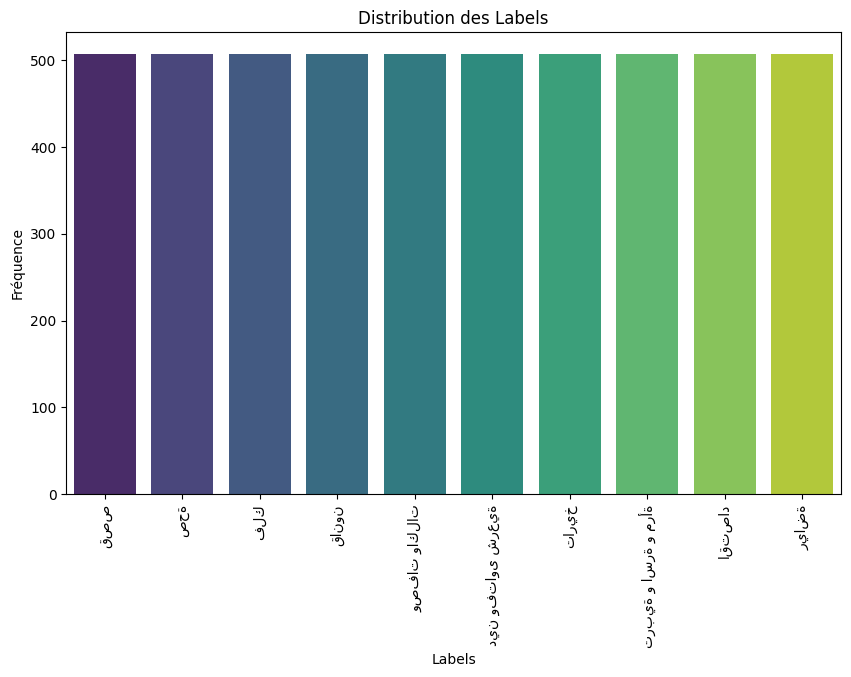

In [ ]:
# Compter les occurrences de chaque label
label_counts = Counter(labels)

# Convertir les résultats en liste (labels et leurs fréquences)
labels_list = list(label_counts.keys())
counts_list = list(label_counts.values())

# Afficher l'histogramme des labels
plt.figure(figsize=(10, 6))
sns.barplot(x=labels_list, y=counts_list, palette='viridis')
plt.xlabel('Labels')
plt.ylabel('Fréquence')
plt.title('Distribution des Labels')
plt.xticks(rotation=90)
plt.show()


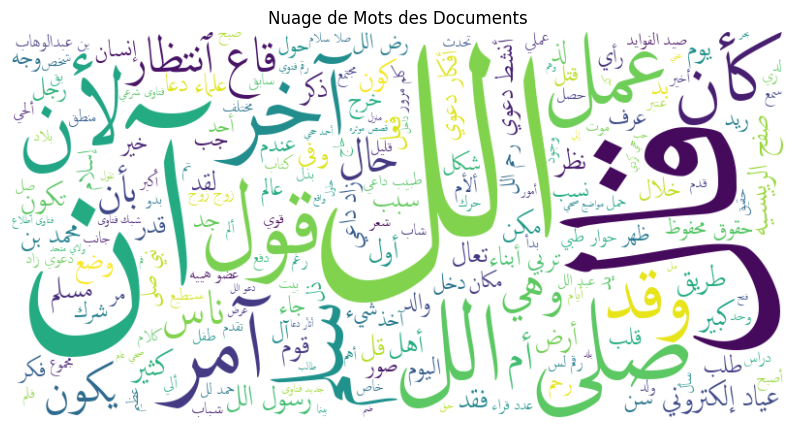

In [ ]:
# Joindre tous les documents pour créer un texte unique
text = " ".join(documents)

# Définir les stopwords (normalisés)
stopwords = set(STOPWORDS).union(normalized_stopwords)

# Créer un nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    font_path = '/content/drive/MyDrive/arabtype.ttf'
).generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuage de Mots des Documents')
plt.show()

# Enregistrer l'image si nécessaire
wordcloud.to_file("wordcloud_output.png")


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1649 (\N{ARABIC LETTER ALEF WASLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


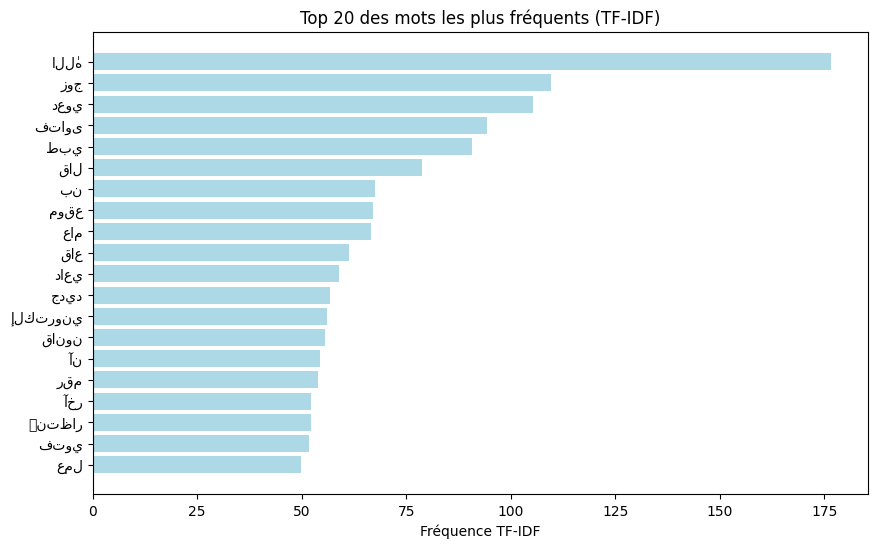

In [ ]:
# Obtenir les mots les plus fréquents
words = vectorizer.get_feature_names_out()
frequencies = np.asarray(X_train_tfidf.sum(axis=0)).flatten()

# Trier les mots par fréquence
sorted_idx = frequencies.argsort()[::-1]
top_words = [words[i] for i in sorted_idx[:20]]  # Top 20 mots
top_freqs = frequencies[sorted_idx[:20]]

# Afficher l'histogramme des fréquences TF-IDF
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs, color='lightblue')
plt.xlabel('Fréquence TF-IDF')
plt.title('Top 20 des mots les plus fréquents (TF-IDF)')
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher le mot le plus fréquent en haut
plt.show()

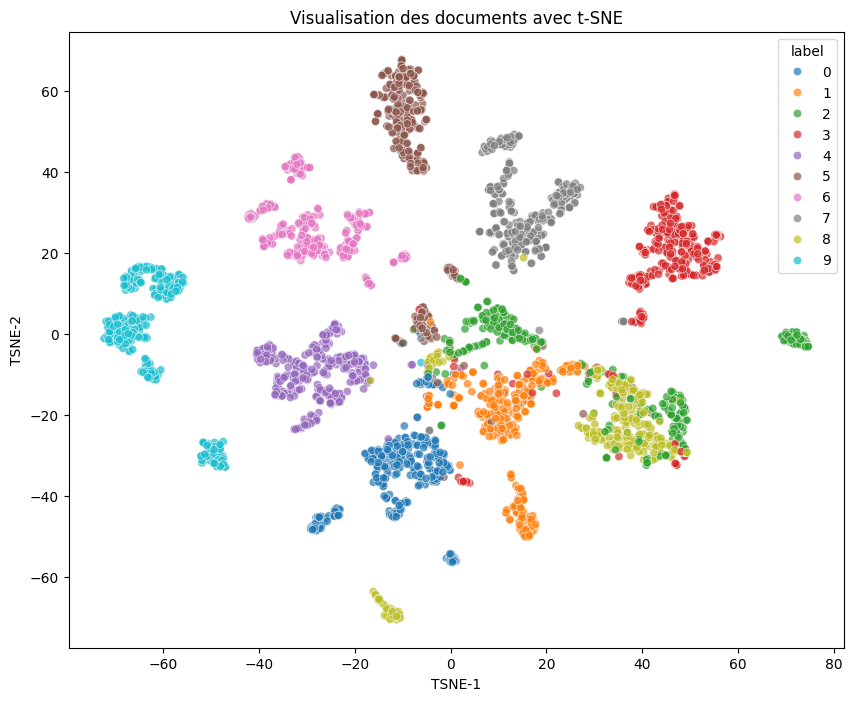

In [ ]:
# Réduire la dimension avec PCA, puis t-SNE
X_pca = PCA(n_components=50).fit_transform(X_train_tfidf.toarray())
X_tsne = TSNE(n_components=2).fit_transform(X_pca)

# Convertir les résultats en DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=["TSNE-1", "TSNE-2"])
df_tsne['label'] = y_train

# Visualiser avec Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x="TSNE-1", y="TSNE-2", hue="label", palette="tab10", legend='full', alpha=0.7)
plt.title('Visualisation des documents avec t-SNE')
plt.show()

In [ ]:
# Afficher les classes et leurs encodages
for i, class_label in enumerate(encoder.classes_):
    print(f"{class_label} → {i}")


اقتصاد → 0
تاريخ → 1
تربية و اسرة و مرأة → 2
دين وفتاوى شرعية → 3
رياضة → 4
صحة → 5
فلك → 6
قانون → 7
قصص → 8
وصفات واكلات → 9


In [ ]:
def split_and_tfidf(documents, labels, test_size=0.3, random_state=42):
    """
    Split les données et applique TF-IDF (fit sur train, transform sur test).

    Returns :
        - X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer
    """

    encoder = LabelEncoder()
    labels_encoded = encoder.fit_transform(labels)

    # Split
    X_train_docs, X_test_docs, y_train, y_test = train_test_split(
        documents, labels_encoded, test_size=test_size, random_state=random_state)

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(tokenizer=tokenize_text, lowercase=False)
    X_train_tfidf = vectorizer.fit_transform(X_train_docs)
    X_test_tfidf = vectorizer.transform(X_test_docs)

    return X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer,encoder


In [ ]:
# Split + TF-IDF + encodage des labels
X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer,encoder = split_and_tfidf(documents, labels)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Valeurs de k à tester pour la sélection de features
k_values = [50, 200, 400, 'all']

# Définition des modèles et de leurs grilles d'hyperparamètres
model_grids = {
    "Naive Bayes": (
        MultinomialNB(),
        {}
    ),
    "SVM": (
        SVC(),
        {
            'model__C': [0.1, 1],
        }
    ),
    "Logistic Regression": (
        LogisticRegression(),
        {
            'model__C': [0.01, 0.1, 1],
            'model__max_iter': [100, 200, 500, 1000]
        }
    )
}

# Boucle sur les modèles
for model_name, (base_model, param_grid) in model_grids.items():
    print(f"\n Model: {model_name}")
    best_score = 0
    best_k = None
    best_params = None
    best_report = None

    for k in k_values:
        # Sélectionneur de caractéristiques
        selector = SelectKBest(score_func=chi2, k=k)

        # Pipeline : SelectKBest + modèle
        pipeline = Pipeline([
            ('selector', selector),
            ('model', base_model)
        ])

        # GridSearch sur les hyperparamètres
        grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_tfidf, y_train)

        # Évaluation sur les données de test
        y_pred = grid.predict(X_test_tfidf)
        acc = accuracy_score(y_test, y_pred)

        k_display = k if isinstance(k, int) else "all"
        print(f"   k={k_display:<4} → Accuracy = {acc:.4f} | Best Params: {grid.best_params_}")

        if acc > best_score:
            best_score = acc
            best_k = k
            best_params = grid.best_params_
            best_report = classification_report(y_test, y_pred, target_names=encoder.classes_) #output_dict=True pour afficher le resultat dans l'ordre correcte

    print(f"\n Meilleur k pour {model_name} = {best_k} avec accuracy = {best_score:.4f}")
    print(f" Meilleurs hyperparamètres : {best_params}")
    print("\n Classification Report:")
    print(best_report)


🔍 Model: Naive Bayes
   k=50   → Accuracy = 0.8429 | Best Params: {}
   k=200  → Accuracy = 0.9178 | Best Params: {}
   k=400  → Accuracy = 0.9297 | Best Params: {}
   k=all  → Accuracy = 0.9428 | Best Params: {}

 Meilleur k pour Naive Bayes = all avec accuracy = 0.9428
 Meilleurs hyperparamètres : {}

 Classification Report:
                     precision    recall  f1-score   support

             اقتصاد       0.99      0.98      0.98       149
              تاريخ       0.95      0.96      0.96       132
تربية و اسرة و مرأة       0.97      0.66      0.78       171
   دين وفتاوى شرعية       1.00      0.93      0.96       135
              رياضة       1.00      0.97      0.98       160
                صحة       0.97      0.99      0.98       149
                فلك       0.99      0.99      0.99       154
              قانون       0.97      0.98      0.97       150
                قصص       0.72      1.00      0.84       169
       وصفات واكلات       1.00      1.00      1.00       15

In [16]:
!cp "/content/drive/MyDrive/Colab Notebooks/classification_projet.ipynb" "/content/Using-text-mining-algorithms-for-the-classification-of-Arabic-texts/"


In [21]:
!git add .


In [22]:
!git commit -m "Ajout du notebook depuis Google Drive"


[main 78c2168] Ajout du notebook depuis Google Drive
 1 file changed, 1 deletion(-)
 delete mode 100644 classification_projet.ipynb


In [23]:
from getpass import getpass

# On te demande ton token GitHub personnel (PAT)
token = getpass('Entrez votre token GitHub :')

# On pousse le code via HTTPS avec ton token
!git remote set-url origin https://{token}@github.com/IbtissamErrachidi/Using-text-mining-algorithms-for-the-classification-of-Arabic-texts.git
!git push origin main


Entrez votre token GitHub :··········
Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (1/1), done.
Writing objects: 100% (2/2), 263 bytes | 263.00 KiB/s, done.
Total 2 (delta 0), reused 1 (delta 0), pack-reused 0
To https://github.com/IbtissamErrachidi/Using-text-mining-algorithms-for-the-classification-of-Arabic-texts.git
   16be7e3..78c2168  main -> main


In [20]:
!rm classification_projet.ipynb